In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
filename = 'dataset_diabetes/diabetic_data.csv'

In [3]:
data = pd.read_csv(filename).to_numpy()

In [4]:
caucasian = 'Caucasian'
aa = 'AfricanAmerican'
female = 'Female'
male = 'Male'
counts = {}
outcomes = {}
for i in data:
    if i[2] == caucasian:
        if caucasian in counts:
            counts[caucasian] += 1
            outcomes[caucasian].append(i[49])
        else:
            counts[caucasian] = 1
            outcomes[caucasian] = []
            outcomes[caucasian].append(i[49])

    if i[2] == aa:
        if aa in counts:
            counts[aa] += 1
            outcomes[aa].append(i[49])
        else:
            counts[aa] = 1
            outcomes[aa] = []
            outcomes[aa].append(i[49])
    if i[3] == female:
        if female in counts:
            counts[female] += 1
            outcomes[female].append(i[49])
        else:
            counts[female] = 1
            outcomes[female] = []
            outcomes[female].append(i[49])
    if i[3] == male:
        if male in counts:
            counts[male] += 1
            outcomes[male].append(i[49])
        else:
            counts[male] = 1        
            outcomes[male] = []
            outcomes[male].append(i[49])


In [5]:
def get_fracs(id):
    totals = [0, 0, 0]
    for i in outcomes[id]:
        if i == 'NO':
            totals[0] += 1
        elif i == '>30':
            totals[1] += 1
        elif i == '<30':
            totals[2] += 1
    num = sum(totals)
    return (totals[0] / num, totals[1] / num, totals[2] / num)

In [6]:
m_fracs = get_fracs(male)
f_fracs = get_fracs(female)
aa_fracs = get_fracs(aa)
c_fracs = get_fracs(caucasian)

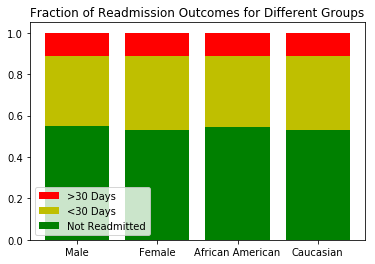

In [7]:
# Fraction of Readmission Outcomes for Different Groups

N = 4
a = [(m_fracs[i], f_fracs[i], aa_fracs[i], c_fracs[i]) for i in range(3)]
ab = [a[0][i] + a[1][i] for i in range(4)]
plt1 = plt.bar(np.arange(N), a[0], color='g')
plt2 = plt.bar(np.arange(N), a[1], bottom = a[0], color = 'y')
plt3 = plt.bar(np.arange(N), a[2], bottom = ab, color = 'r')
plt.title('Fraction of Readmission Outcomes for Different Groups')
plt.xticks(np.arange(N), ('Male', 'Female', 'African American', 'Caucasian'))
plt.legend((plt3, plt2, plt1), ('>30 Days', '<30 Days', 'Not Readmitted'))
plt.show()

Text(0.5,1,'Breakdown of Dataset by Race')

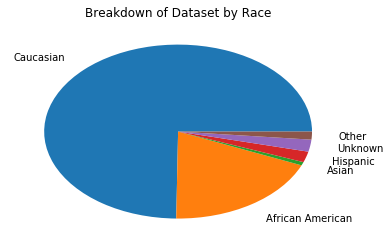

In [18]:
# Pie Chart for Race
races = {}
for i in data:
    try:
        races[i[2]] += 1
    except:
        races[i[2]] = 1
segs = []
labels = []
for i in races:
    if i == '?':
        labels.append('Unknown')
    elif i == 'AfricanAmerican':
        labels.append('African American')
    else:
        labels.append(i)
    segs.append(races[i])
reorder = [0, 1, 4, 5, 2, 3]
l_f = []
s_f = []
for i in reorder:
    l_f.append(labels[i])
    s_f.append(segs[i])
plt.pie(s_f, labels = l_f, labeldistance = 1.2)
plt.title('Breakdown of Dataset by Race')

Text(0.5,1,'Breakdown of Dataset by Sex')

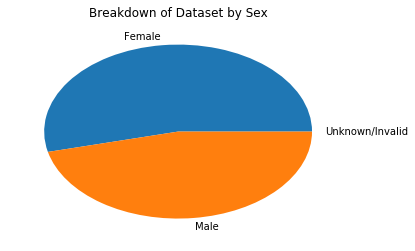

In [12]:
# Pie Chart by Gender
g = {}
for i in data:
    try:
        g[i[3]] += 1
    except:
        g[i[3]] = 1
segs = []
labels = []
for i in g:
    labels.append(i)
    segs.append(g[i])
plt.pie(segs, labels = labels)
plt.title('Breakdown of Dataset by Sex')

Text(0.5,1,'Breakdown of Dataset by Readmission Results')

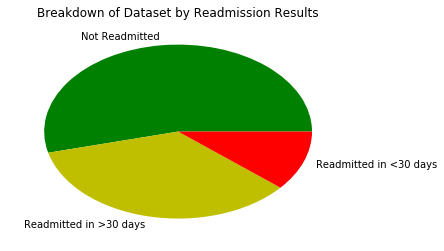

In [87]:
# Pie Chart by Readmittance
r = {}
for i in data:
    try:
        r[i[49]] += 1
    except:
        r[i[49]] = 1
segs = []
labels = []
colors = []
for i in r:
    if i == 'NO':
        labels.append('Not Readmitted')
        colors.append('g')
    elif i == '<30':
        labels.append('Readmitted in <30 days')
        colors.append('r')
    else:
        labels.append('Readmitted in >30 days')
        colors.append('y')
    segs.append(r[i])
plt.pie(segs, labels = labels, colors = colors)
plt.title('Breakdown of Dataset by Readmission Results')

0.25993747310201426


Text(0.5,1,'Plot of Medications vs Lab Procedures (correlation = 0.27)')

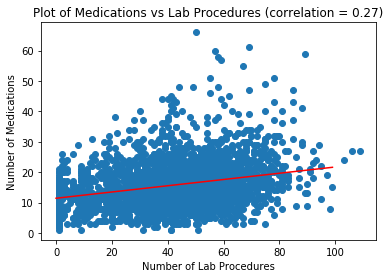

In [95]:
# Correlating num lab procedures (12) with number of medications (14)
pts_x = []
pts_y = []
for i in data:
    if np.random.randint(0, 40) == 1:
        pts_x.append(i[12])
        pts_y.append(i[14])
print(np.corrcoef([pts_x, pts_y])[0, 1])
plt.scatter(pts_x, pts_y)
m,b = np.polyfit(pts_x, pts_y, 1)
xline = np.arange(0, 100)
plt.plot(xline, m * xline + b, color = 'r')
plt.xlabel('Number of Lab Procedures')
plt.ylabel('Number of Medications')
plt.title('Plot of Medications vs Lab Procedures (correlation = 0.27)')

In [88]:
print(data.shape)

(101766, 50)


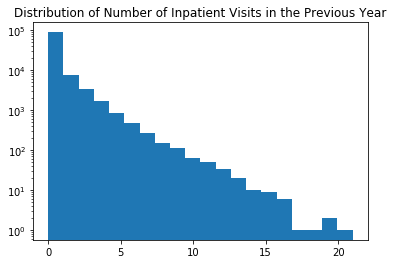

In [32]:
# Number of hospital visits histogram

n_out = []
n_emergency = []
n_in = []

for i in data:
    n_out.append(i[15])
    n_emergency.append(i[16])
    n_in.append(i[17])
plt.hist(n_in, bins = 20)
plt.title('Distribution of Number of Inpatient Visits in the Previous Year')
plt.yscale('log')